<a href="https://colab.research.google.com/github/gonzaloelejalde/piii-2025/blob/main/clase04/clase04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 8

Aliasing: El aliasing ocurre cuando una señal se muestrea a una frecuencia menor que el doble de su componente de frecuencia más alta. Cuando hay aliasing:

-Las componentes de alta frecuencia “se pliegan” hacia frecuencias más bajas.

-Esto genera distorsión espectral, porque la FFT muestra picos en lugares incorrectos


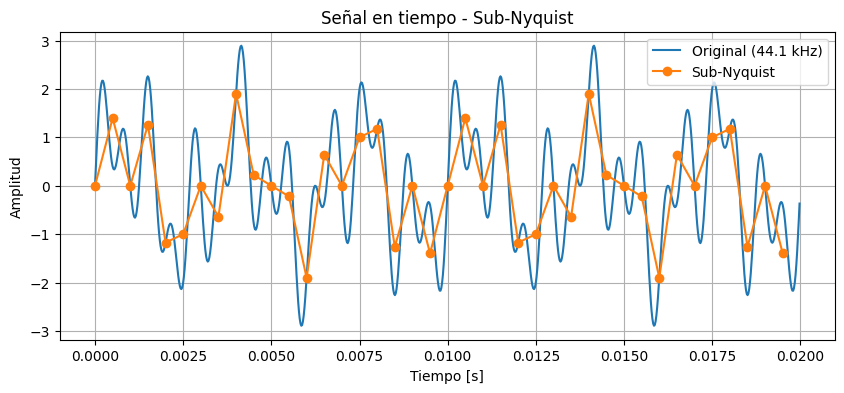

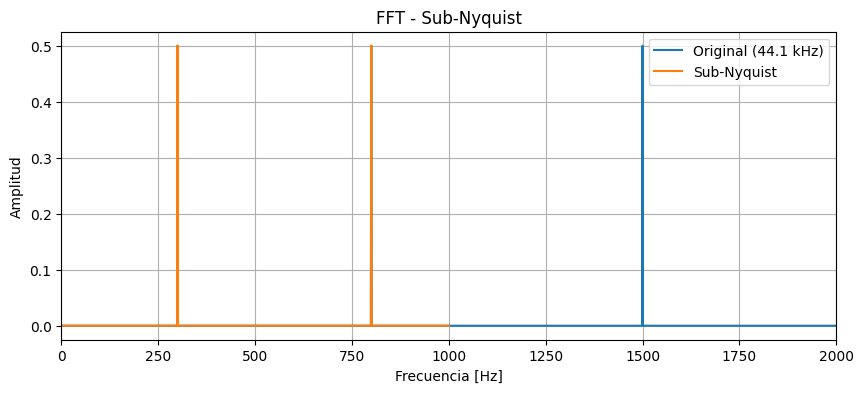

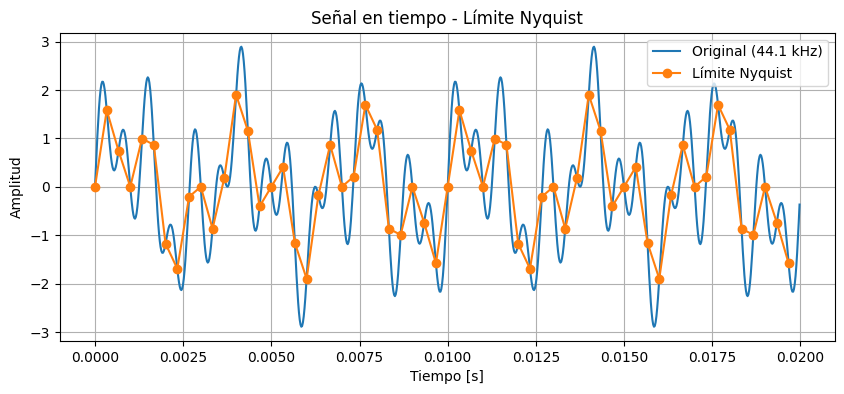

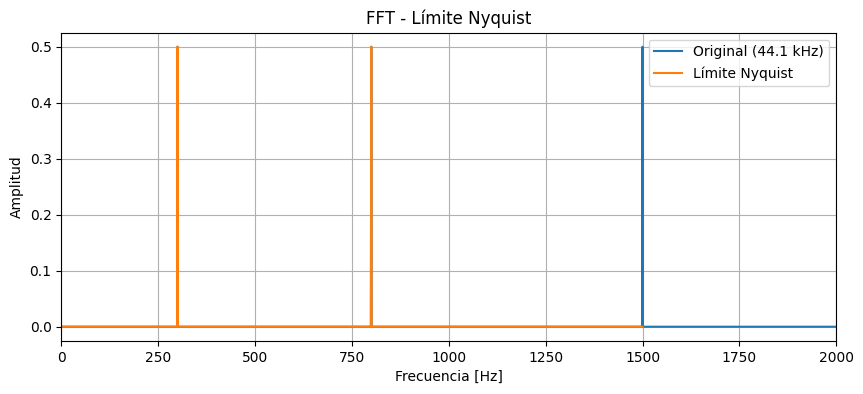

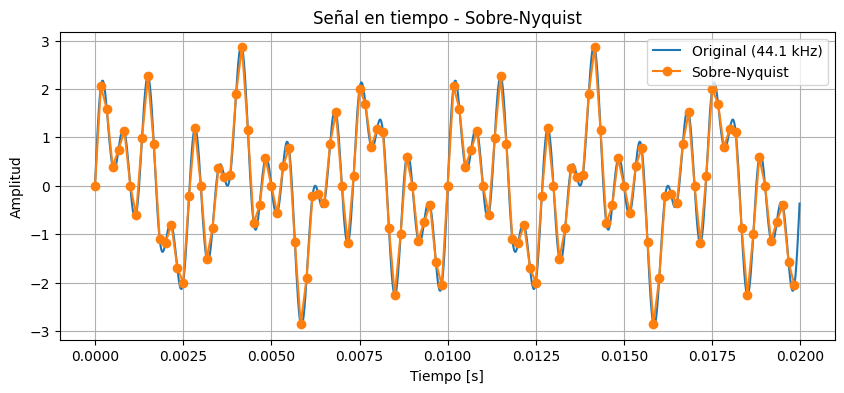

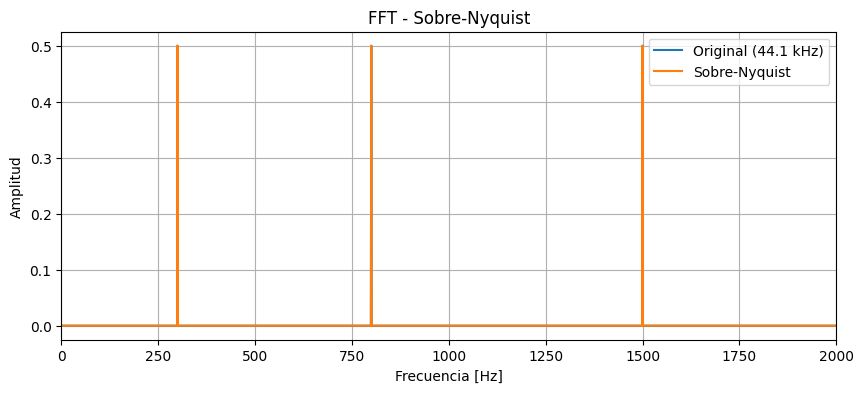

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import resample

# Parámetros
fs_orig = 44100       # Frecuencia de muestreo original (alta)
dur = 1.0             # Duración en segundos
t = np.linspace(0, dur, int(fs_orig*dur), endpoint=False)

# Frecuencias de la señal compuesta
f1, f2, f3 = 300, 800, 1500
signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t) + np.sin(2*np.pi*f3*t)

# Frecuencias de muestreo alternativas
fmax = max(f1, f2, f3)
fs_bajo   = 2000   # menor que 2*fmax = 3000 → produce aliasing
fs_limite = 3000   # justo en 2*fmax
fs_alto   = 6000   # bastante mayor a 2*fmax

# Función para remuestrear
def remuestrear(sig, fs_target):
    N_target = int(len(sig) * fs_target / fs_orig)
    sig_resampled = resample(sig, N_target)
    t_new = np.linspace(0, dur, N_target, endpoint=False)
    return t_new, sig_resampled

# Remuestreos
t_bajo, sig_bajo     = remuestrear(signal, fs_bajo)
t_limite, sig_limite = remuestrear(signal, fs_limite)
t_alto, sig_alto     = remuestrear(signal, fs_alto)

# Función para graficar FFT
def plot_fft(sig, fs, label):
    N = len(sig)
    freqs = np.fft.rfftfreq(N, 1/fs)
    fft_vals = np.abs(np.fft.rfft(sig)) / N
    plt.plot(freqs, fft_vals, label=label)
    plt.xlim(0, 2000)

# 1) Original vs Sub-Nyquist (tiempo)
plt.figure(figsize=(10,4))
plt.plot(t[:int(fs_orig*0.02)], signal[:int(fs_orig*0.02)], label="Original (44.1 kHz)")
plt.plot(t_bajo[:int(fs_bajo*0.02)], sig_bajo[:int(fs_bajo*0.02)], 'o-', label="Sub-Nyquist")
plt.title("Señal en tiempo - Sub-Nyquist")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid(True)
plt.show()

# 2) FFT Sub-Nyquist
plt.figure(figsize=(10,4))
plot_fft(signal, fs_orig, "Original (44.1 kHz)")
plot_fft(sig_bajo, fs_bajo, "Sub-Nyquist")
plt.title("FFT - Sub-Nyquist")
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid(True)
plt.show()

# 3) Original vs Límite de Nyquist (tiempo)
plt.figure(figsize=(10,4))
plt.plot(t[:int(fs_orig*0.02)], signal[:int(fs_orig*0.02)], label="Original (44.1 kHz)")
plt.plot(t_limite[:int(fs_limite*0.02)], sig_limite[:int(fs_limite*0.02)], 'o-', label="Límite Nyquist")
plt.title("Señal en tiempo - Límite Nyquist")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid(True)
plt.show()

# 4) FFT Límite Nyquist
plt.figure(figsize=(10,4))
plot_fft(signal, fs_orig, "Original (44.1 kHz)")
plot_fft(sig_limite, fs_limite, "Límite Nyquist")
plt.title("FFT - Límite Nyquist")
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid(True)
plt.show()

# 5) Original vs Sobre-Nyquist (tiempo)
plt.figure(figsize=(10,4))
plt.plot(t[:int(fs_orig*0.02)], signal[:int(fs_orig*0.02)], label="Original (44.1 kHz)")
plt.plot(t_alto[:int(fs_alto*0.02)], sig_alto[:int(fs_alto*0.02)], 'o-', label="Sobre-Nyquist")
plt.title("Señal en tiempo - Sobre-Nyquist")
plt.xlabel("Tiempo [s]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid(True)
plt.show()

# 6) FFT Sobre-Nyquist
plt.figure(figsize=(10,4))
plot_fft(signal, fs_orig, "Original (44.1 kHz)")
plot_fft(sig_alto, fs_alto, "Sobre-Nyquist")
plt.title("FFT - Sobre-Nyquist")
plt.xlabel("Frecuencia [Hz]"); plt.ylabel("Amplitud"); plt.legend(); plt.grid(True)
plt.show()


El aliasing solo ocurre en el primer caso (sub-Nyquist, fs = 2000 Hz < 2·fmax).
La componente de 1500 Hz no puede representarse correctamente y aparece reflejada como una frecuencia más baja. Esto provoca que en el espectro se “mezcle” con las otras componentes, dando picos en posiciones falsas y una señal temporal distinta de la original

Ejercicio 9

La cuantificación es el proceso de redondear la señal a niveles discretos, y la distorsión por granularidad es el error/distorsión que aparece cuando la resolución es baja y los escalones se notan en la señal.
SNR = Relacion Señal-Ruido (Singal-to-Noise Ratio)

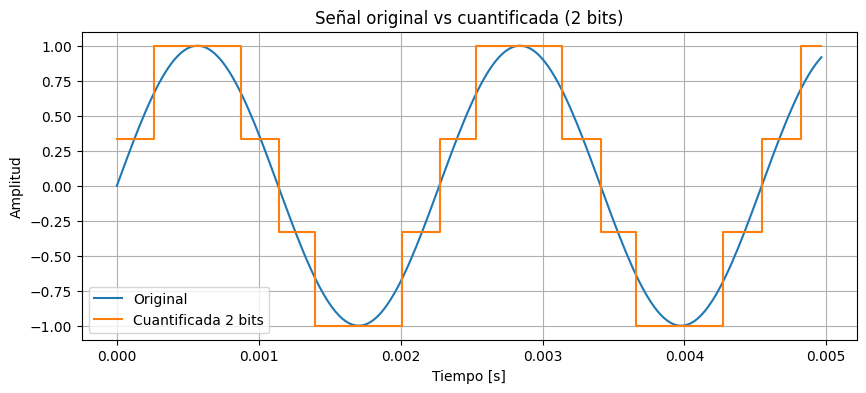

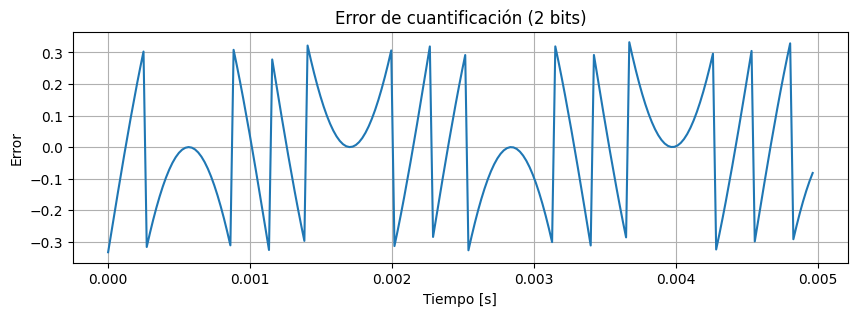

Nbits = 2 → SNR medido = 12.22 dB | SNR teórico ≈ 13.80 dB


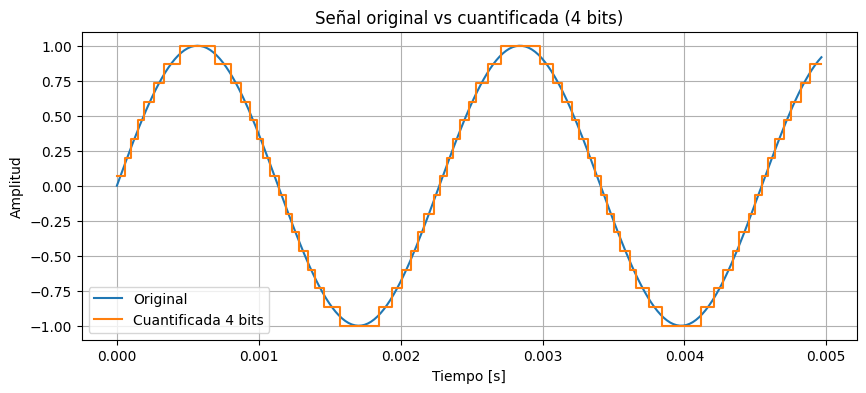

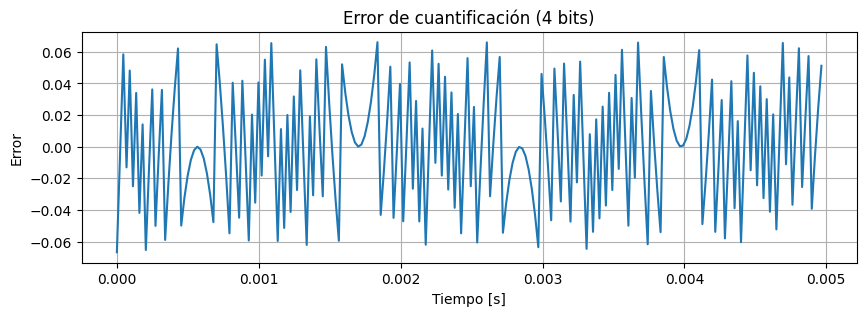

Nbits = 4 → SNR medido = 25.68 dB | SNR teórico ≈ 25.84 dB


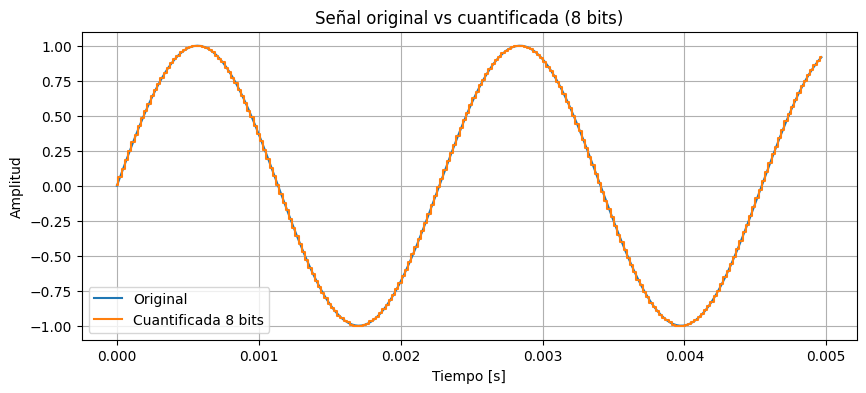

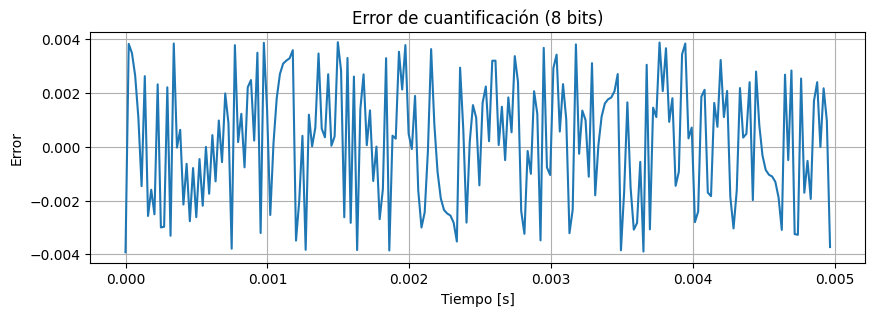

Nbits = 8 → SNR medido = 49.98 dB | SNR teórico ≈ 49.92 dB


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
fs = 44100
f = 440
dur = 2.0
t = np.linspace(0, dur, int(fs*dur), endpoint=False)
x = np.sin(2*np.pi*f*t)  # onda seno

# Función de cuantificación
def cuantificar(signal, Nbits, amp=1.0):
    niveles = 2**Nbits
    step = (2*amp) / (niveles - 1)
    # Escalonamiento
    x_q = np.round((signal + amp) / step) * step - amp
    return x_q

# Función para calcular SNR
def calc_snr(x, x_q):
    error = x - x_q
    Ps = np.mean(x**2)
    Pn = np.mean(error**2)
    return 10*np.log10(Ps/Pn)

# Probar distintos Nbits
for Nbits in [2, 4, 8]:
    x_q = cuantificar(x, Nbits)
    error = x - x_q

    # Graficar señal original vs cuantificada
    plt.figure(figsize=(10,4))
    muestras_zoom = int(fs*0.005)  # ~5 ms de zoom (~2 ciclos de 440 Hz)
    plt.plot(t[:muestras_zoom], x[:muestras_zoom], label="Original")
    plt.step(t[:muestras_zoom], x_q[:muestras_zoom], where='mid', label=f"Cuantificada {Nbits} bits")
    plt.title(f"Señal original vs cuantificada ({Nbits} bits)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar error de cuantificación
    plt.figure(figsize=(10,3))
    plt.plot(t[:muestras_zoom], error[:muestras_zoom], label="Error")
    plt.title(f"Error de cuantificación ({Nbits} bits)")
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()

    # Calcular SNR
    snr_medido = calc_snr(x, x_q)
    snr_teorico = 6.02*Nbits + 1.76
    print(f"Nbits = {Nbits} → SNR medido = {snr_medido:.2f} dB | SNR teórico ≈ {snr_teorico:.2f} dB")


El error oscila alrededor de 0.

Los valores están dentro del rango ±Δ/2. En este caso, con amplitud 1 y 8 bits, ≈0.0078

entonces el error máximo es
± 0.0039

Con 8 bits, el escalón de cuantización es muy chico, por eso el error se parece a ruido aleatorio en lugar de un patrón grande.

En cambio, al graficar el error para 2 bits o 4 bits, se ve que toma valores mucho más grandes y con forma más escalonada